In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_lables),(test_images,test_lables)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
class_names=['T-shirt','Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_lables)

60000

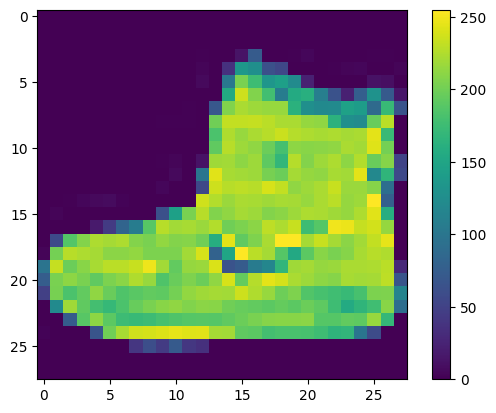

In [ ]:
plt.figure
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

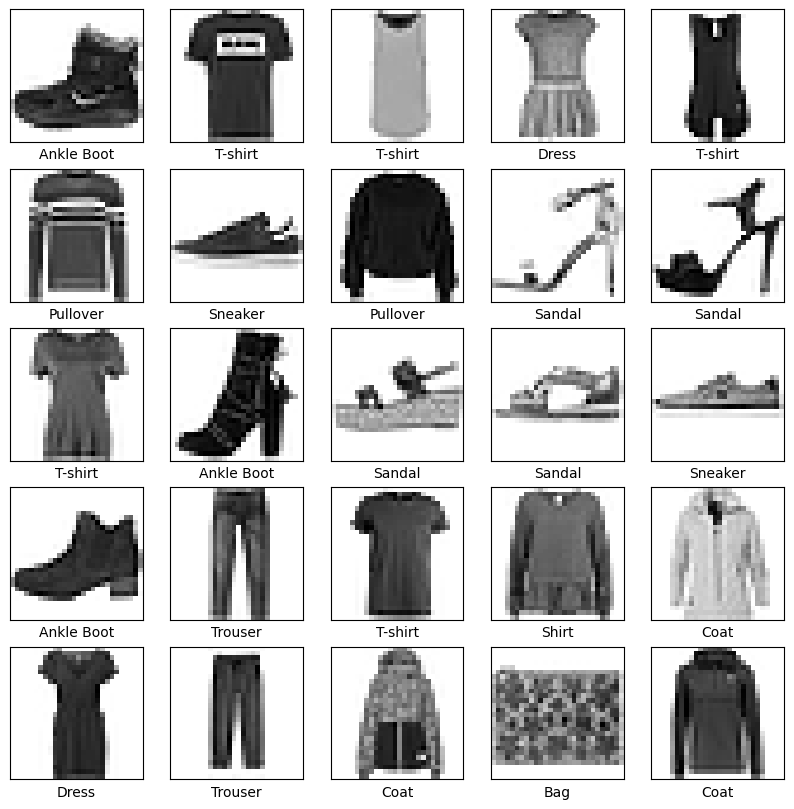

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_lables, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4988 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3804 - accuracy: 0.8635
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3404 - accuracy: 0.8752
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3165 - accuracy: 0.8828
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.8907


In [ ]:
test_loss, test_acc=model.evaluate(test_images, test_lables, verbose=2)
print('\nTest Accuracy of the model is: ', test_acc)

313/313 - 1s - loss: 0.3486 - accuracy: 0.8744 - 1s/epoch - 4ms/step

Test Accuracy of the model is:  0.8744000196456909


In [ ]:
probability_model=tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions=probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[:2]

array([[1.1105941e-04, 4.9684706e-07, 7.3165211e-07, 3.2200369e-08,
        6.0741218e-06, 5.5184680e-01, 1.4772615e-05, 2.2493590e-02,
        7.9422828e-04, 4.2473227e-01],
       [7.6967641e-05, 7.2085171e-11, 9.9881387e-01, 1.6796411e-09,
        3.1433374e-04, 2.4124174e-09, 7.9494616e-04, 1.5027470e-15,
        8.4771723e-10, 1.4565915e-13]], dtype=float32)

In [ ]:
np.argmax(predictions[1])

2

In [ ]:
test_lables[1]

2

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img=true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_labels=np.argmax(predictions_array)
    if predicted_labels==true_label:
        color='blue'
    else:
        color='red'

    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_labels],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array,true_label):
    true_labels=true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_labels].set_color('blue')

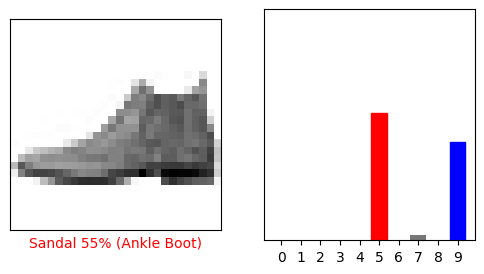

In [ ]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lables, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_lables)
plt.show()


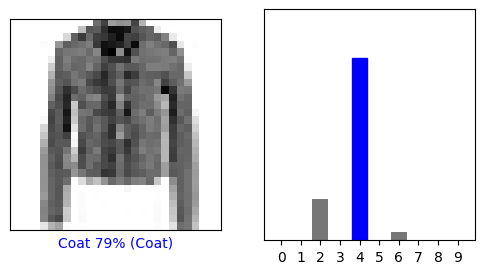

In [ ]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lables, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_lables)
plt.show()

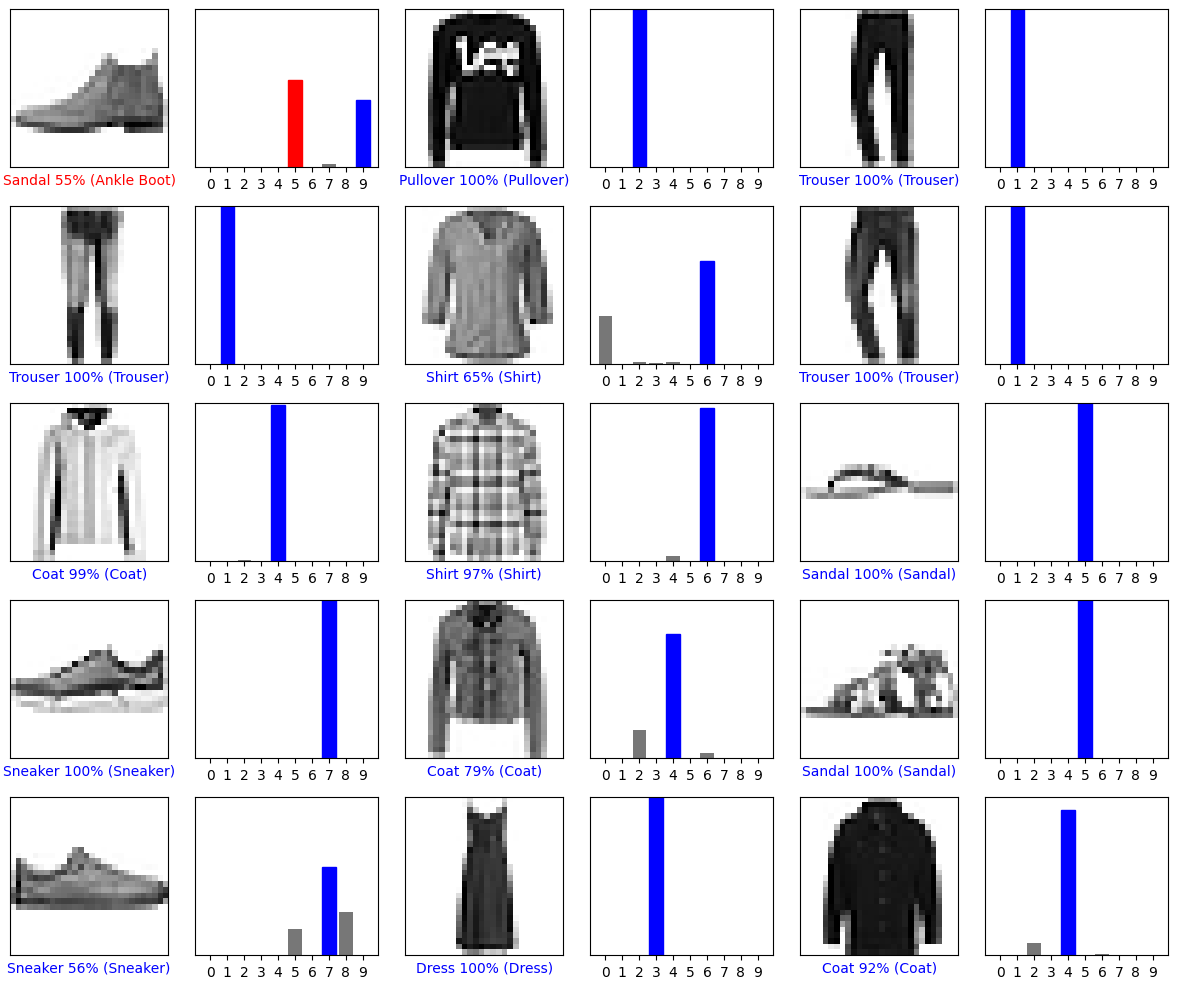

In [ ]:
num_rows=5
num_cols=3
num_images=num_row*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_lables, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_lables)
plt.tight_layout()
plt.show()

In [ ]:
img=test_images[99]
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single=probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[3.2919520e-04 2.0126829e-06 9.0575069e-01 1.4507455e-05 2.9530474e-03
  1.1288468e-08 9.0949900e-02 1.7783251e-12 7.9368044e-07 9.8156851e-11]]


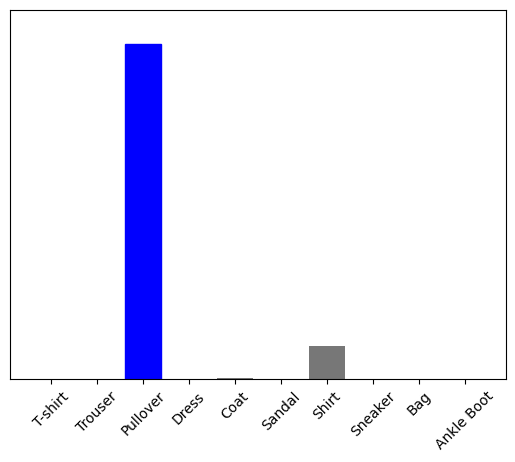

In [ ]:
plot_value_array(1, predictions_single[0], test_lables)
_=plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2